In [1]:
import glob
import chess_SL_E5_lib as lib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import chess
import numpy as np

MODEL_NUM = 5

In [2]:
lib.fen_str_to_flat_tensor('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1')

tensor([[-4., -2., -3., -5., -6., -3., -2., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  2.,  3.,  5.,  6.,  3.,  2.,  4.]])

In [3]:
lib.fen_str_to_3d_tensor('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1')

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [-1., -1., -1., -1., -1., -1., -1., -1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0., -2.,  0.,  0.,  0.,  0., -2.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.]],

        [[ 0.,  0., -3.,  0.,  0., -3.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0

In [4]:
path = "../Data/DataTrain"

letters_in = 'abcd'
letters_out = 'defg'

# csv_files1 = csv_files2 = glob.glob(f'{path}/Chess_Jan_aa*')

csv_files1 = glob.glob(f'{path}/Chess_Jan_a*') + glob.glob(f'{path}/Chess_Jan_b*') + glob.glob(f'{path}/Chess_Jan_c*') + glob.glob(f'{path}/Chess_Jan_d*')
csv_files2 = glob.glob(f'{path}/Chess_Jan_d*') + glob.glob(f'{path}/Chess_Jan_e*')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Models Trained
- V1 -> Predictor: tensor [64,64]
- V2 -> Predictor: tensor [64,64]
- V3 -> Predictor: tensor [64,64]
- V4 -> Predictor: tensor [64,64]

- E1 -> Epochs: 200, SGD(Learning Rate: 0.030, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "a*" |||| Vars: FEN, white_active, is_check |||| Predictor: CP
- E2 -> Epochs: 200, SGD(Learning Rate: 0.035, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "b*" |||| Vars: FEN, white_active, is_check |||| Predictor: CP
- E3 -> Epochs: 75, Adam(Learning Rate: 0.006, Mometum = 0.9), Loss: L1Loss, Training: "a|b*", Validation: "c|d*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E3.1 -> Epochs: 50, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c*", Validation: "d|e|f*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E3.2 -> Epochs: 40, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e|f|g*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E4.1 -> Epochs: 25, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e|f|g*" |||| Vars: FEN, white_active, is_capture |||| Predictor: CP
- E5.1 -> Epochs: 25, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e*" |||| Vars: FEN |||| Predictor: CP

In [5]:
# Create a dataset
dataset1 = lib.ChessIterableDataset(csv_files1, chunksize = 50000)
dataset2 = lib.ChessIterableDataset(csv_files2, chunksize = 50000)

# Create a data loader
train_data_loader = DataLoader(dataset1, batch_size = 25000)
val_data_loader = DataLoader(dataset2, batch_size = 25000)

# Create a model
model = lib.EvalNet()
model = model.to(device)

criterion = nn.L1Loss() # nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.035, momentum=0.9)

optimizer = optim.Adam(model.parameters(), lr=0.006)

# Train the model
training_loss_history, validation_loss_history = lib.train(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=25)


Begin Training!
Epoch 1/25, Training Loss: 2.31520, Validation Loss: 1.91850
Epoch 2/25, Training Loss: 1.85763, Validation Loss: 1.91465
Epoch 3/25, Training Loss: 1.80148, Validation Loss: 1.79763
Epoch 4/25, Training Loss: 1.76491, Validation Loss: 1.75188
Epoch 5/25, Training Loss: 1.74010, Validation Loss: 1.71774
Epoch 6/25, Training Loss: 1.72626, Validation Loss: 1.70228
Epoch 7/25, Training Loss: 1.71102, Validation Loss: 1.71099
Epoch 8/25, Training Loss: 1.69927, Validation Loss: 1.72623
Epoch 9/25, Training Loss: 1.68719, Validation Loss: 1.68746
Epoch 10/25, Training Loss: 1.68235, Validation Loss: 1.67148
Epoch 11/25, Training Loss: 1.68097, Validation Loss: 1.67880
Epoch 12/25, Training Loss: 1.66893, Validation Loss: 1.67608
Epoch 13/25, Training Loss: 1.66689, Validation Loss: 1.66290
Epoch 14/25, Training Loss: 1.65919, Validation Loss: 1.64899
Epoch 15/25, Training Loss: 1.65344, Validation Loss: 1.65113
Epoch 16/25, Training Loss: 1.64681, Validation Loss: 1.64037
E

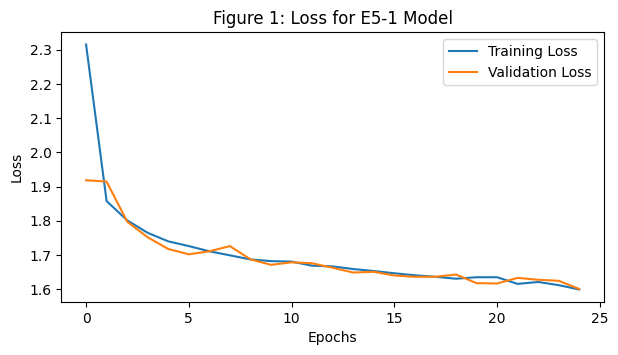

<Figure size 640x480 with 0 Axes>

In [ ]:
torch.save(model, f'model_E{MODEL_NUM}-1.pth')

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3.5))
plt.plot(training_loss_history, label = 'Training Loss')
plt.plot(validation_loss_history, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0, None)
plt.title(f'Figure 1: Loss for E{MODEL_NUM}-1 Model')
plt.legend()
plt.show()
plt.savefig(f'Loss_E{MODEL_NUM}-1.png')


# NOTE TO SELF - TEST NEW STOCHASTIC PREDICTION FUNCTION

In [7]:
import pickle

pickle.dump(training_loss_history, open('training_loss_history_E5-1.pkl', 'wb'))
pickle.dump(validation_loss_history, open('validation_loss_history_E5-1.pkl', 'wb'))

In [1]:
import glob
import chess_SL_E5_lib as lib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import chess
import numpy as np

MODEL_NUM = 5

model_loaded = torch.load('model_E5-1.pth')

In [2]:
board = chess.Board()

[-0.02847062  0.04788858 -0.04157221 -0.05299222  0.01202708  0.01881316
 -0.26222724 -0.00620252 -0.16654855 -0.08726381 -0.14589266 -0.05056874
 -0.0698514  -0.11462393 -0.21340725  0.0923982   0.04562366  0.08058515
 -0.09771244 -0.01005797]
[Move.from_uci('g1h3') Move.from_uci('g1f3') Move.from_uci('b1c3')
 Move.from_uci('b1a3') Move.from_uci('h2h3') Move.from_uci('g2g3')
 Move.from_uci('f2f3') Move.from_uci('e2e3') Move.from_uci('d2d3')
 Move.from_uci('c2c3') Move.from_uci('b2b3') Move.from_uci('a2a3')
 Move.from_uci('h2h4') Move.from_uci('g2g4') Move.from_uci('f2f4')
 Move.from_uci('e2e4') Move.from_uci('d2d4') Move.from_uci('c2c4')
 Move.from_uci('b2b4') Move.from_uci('a2a4')]
[ 6 14  8 10 13 18  9 12  3 11  2  0 19  7  4  5 16  1 17 15]
0.9997286147365662
[Move.from_uci('e2e4') Move.from_uci('c2c4') Move.from_uci('g1f3')
 Move.from_uci('d2d4') Move.from_uci('g2g3') Move.from_uci('h2h3')
 Move.from_uci('e2e3') Move.from_uci('a2a4') Move.from_uci('g1h3')
 Move.from_uci('b1c3') Mo

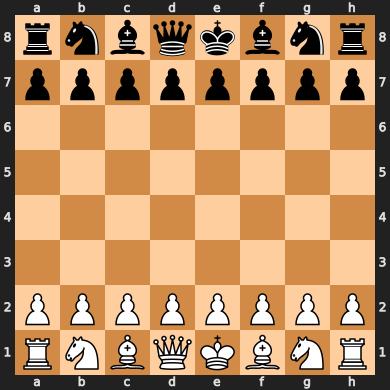

In [7]:
move = lib.predict(model_loaded, board.fen())
print(move)
board

In [4]:
board.push_uci(move)
board

TypeError: object of type 'Move' has no len()

In [ ]:
move = lib.predict(model_loaded, board.fen())

In [ ]:
move = 'e4f6'

In [ ]:
# TODO : make prediction function
# TODO : speed up